#### This notebook is for inspecting an example `.h5' file produced by running `check_frb_.py' on a `.fil' file of the crab nebula 

### Author: Maxwell A. fine
### June 2024

I did not know it when I wrote this, but this is basically  the same as plotting function https://github.com/thepetabyteproject/your/blob/main/your/utils/plotter.py

In [42]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import h5py # new to read in h5 files

data_file = 'CRAB_PV_Band_2024_05_25_15_55_40_tcand_322.4286720_dm_56.0_snr_8.5.h5'


### Attempt to read in with pandas (this doesnt work relax)

In [11]:
# this should print a error msg

data_df = pd.read_hdf(data_file, )

/home/afinemax/anaconda3/envs/astron_research_2024/lib/python3.9/site-packages/tables/attributeset.py:290: DataTypeWarning: Unsupported type for attribute 'rfi_mask' in node '/'. Offending HDF5 class: 8
  value = self._g_getattr(self._v_node, name)
/home/afinemax/anaconda3/envs/astron_research_2024/lib/python3.9/site-packages/tables/attributeset.py:290: DataTypeWarning: Unsupported type for attribute 'kill_mask' in node '/'. Offending HDF5 class: 8
  value = self._g_getattr(self._v_node, name)


ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.

### Now with h5py, this is kinda like astropy with `.fits' files?

In [41]:
data_list = [] # same as length of keys
# Open the HDF5 file
# convert into np format, with keys seperate


root_attrs_dict = {} # this is like a .fits header 
with h5py.File(data_file, 'r') as hdf:

    # makes dict with header info
    # List all attributes of the root group
    root_attrs = list(hdf.attrs.keys())
    
    # Access and store each attribute in the dictionary
    for attr in root_attrs:
        root_attrs_dict[attr] = hdf.attrs[attr]

    print(root_attrs_dict)

    print("Keys: %s" % hdf.keys()) # prints data table names

    keys = hdf.keys()

    dataset = hdf['data_dm_time']
    print("Attributes of the dataset:", list(dataset.attrs.keys()))
     # Access a specific attribute
    for attr in dataset.attrs:
        print(f"Attribute {attr}: {dataset.attrs[attr]}")


    
    keys_list = list(keys)
    print('shape of data ', np.shape(hdf))
    # Convert data from the first group to a NumPy array
    for i in ran
        data_list.append(hdf[keys_list[i]][:])
        print(keys_list[i])
        print(data_list[i])

  

{'basename': 'CRAB_PV_Band_2024_05_25_15_55_40', 'bw': -20.0, 'cand_id': 'cand_tstart_60455.580335648148_tcand_322.4286720_dm_56.00000_snr_8.50000', 'center_freq': 410.0625, 'dec_deg': 22.01450053463128, 'dm': 56.0, 'dm_opt': -0.05011777347397489, 'dtype': 'float32', 'fch1': 420.0, 'filelist': array(['/data2/camrasdemo/maxfine/pipeline_test_june/crab/CRAB_PV_Band_2024_05_25_15_55_40.fil'],
      dtype=object), 'filename': '/data2/camrasdemo/maxfine/pipeline_test_june/crab/CRAB_PV_Band_2024_05_25_15_55_40.fil', 'foff': -0.125, 'format': 'fil', 'frequency_decimation_factor': 1, 'gb': -5.784489156475473, 'gl': 4.557372866806219, 'kill_mask': array([False]), 'label': -1, 'native_foff': -0.125, 'native_nbits': 32, 'native_nchans': 160, 'native_nspectra': 1690460.0, 'native_tsamp': 0.000192, 'nbits': 32, 'nchans': 160, 'npol': 1, 'nspectra': 1690460, 'poln_order': 'I', 'ra_deg': 83.63291382057062, 'rfi_mask': array([False]), 'snr': 8.5, 'snr_opt': 12.438083, 'source_name': 'CRAB', 'tcand': 3

In [22]:
keys_list

['data_dm_time', 'data_freq_time']

In [24]:
np.shape(data_list[0])

(256, 256)

In [26]:
np.shape(data_list[1])

(256, 256)

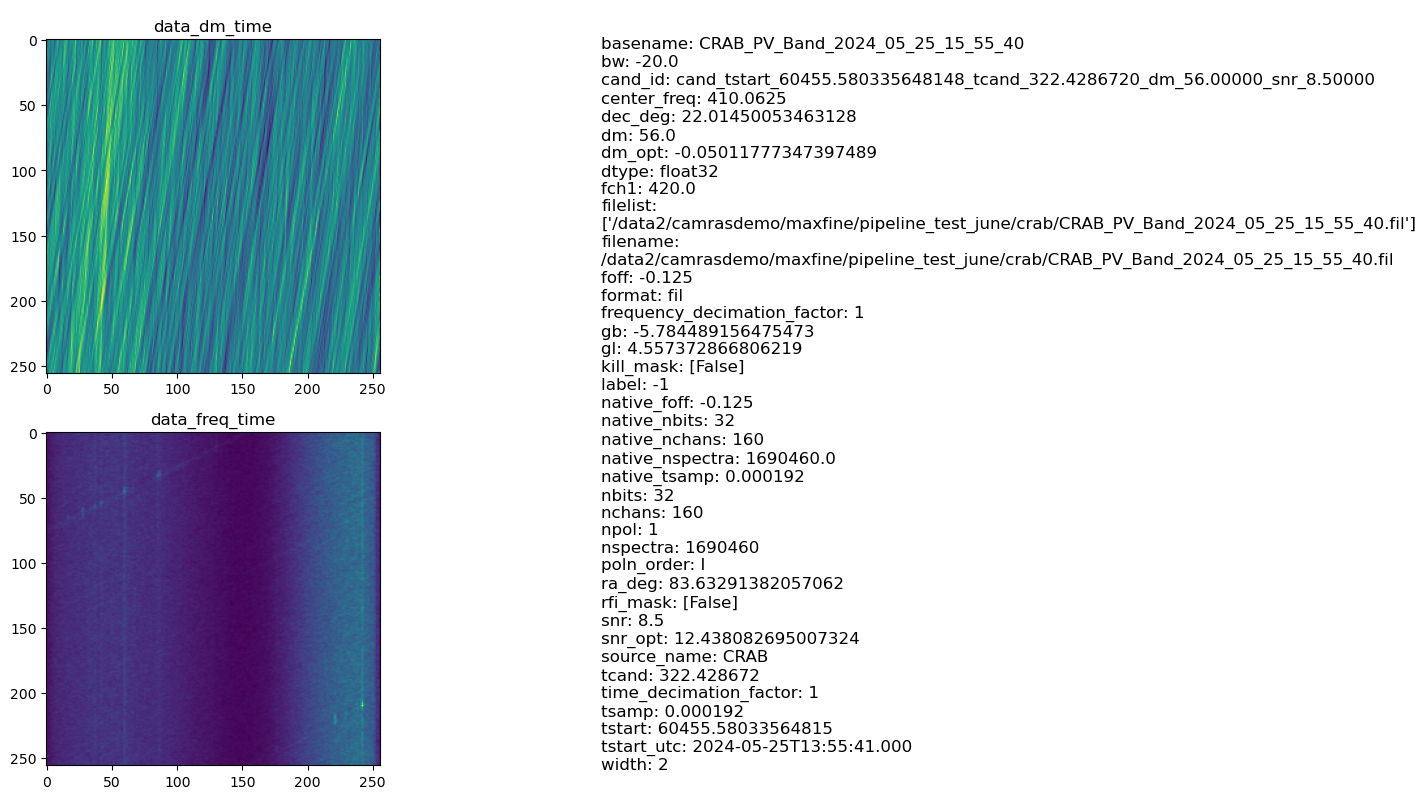

In [61]:




# Create a figure with a specific size
fig = plt.figure(figsize=(12, 8))

# Create a GridSpec layout with 1 row and 2 columns (one for plots, one for text)
gs = GridSpec(2, 2,  width_ratios=[3, 1])

# Add the first plot to the left side

for i in range(len(keys_list)):
    axi = fig.add_subplot(gs[i, 0], aspect=3)
    axi.imshow(data_list[i])
    axi.set_title(keys_list[i])



# Combine the attributes into a formatted string
attrs_text = '\n'.join([f'{key}: {value}' for key, value in root_attrs_dict.items()])

#plt.suptitle(data_file, fontsize=16)

# Add the text to the right side
fig.text(0.75, 0.5, attrs_text, ha='left', va='center', fontsize=12, wrap=True)
plt.tight_layout()
# Save the figure
plt.savefig('combined_plot.png', bbox_inches='tight')

# Optionally, show the plot (not necessary for saving)
plt.show()
